# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\10497\AppData\Local\Temp\ipykernel_321864\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\10497\AppData\Local\Temp\ipykernel_321864\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9295208618248998

In [15]:
under_log.score(X_test, y_test)

0.9267616785431513

In [16]:
smote_log.score(X_test, y_test)

0.9276134264257779

In [17]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [18]:
# Sensitivity here in credit fraud is more important as seen from last class

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true = y_test

In [21]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77248,  5784],
       [   91,   235]], dtype=int64)

In [22]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7208588957055214


In [23]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77018,  6014],
       [   91,   235]], dtype=int64)

In [24]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7208588957055214


In [25]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77089,  5943],
       [   91,   235]], dtype=int64)

In [26]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7208588957055214


Over Sample and SMOTE Sample

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [27]:
X_train = pd.DataFrame(X_train,columns=X.columns)
y_train = pd.DataFrame(y_train,columns=["is_fraud"])

In [28]:
raw_temp = pd.concat([X_train, y_train], axis =1)

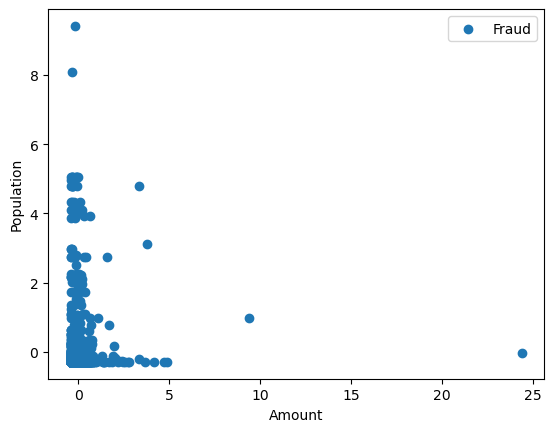

In [29]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [30]:
smote_X_df = pd.DataFrame(smote_X,columns=X.columns)
smote_y_df = pd.DataFrame(smote_y,columns=["is_fraud"])
raw_temp = pd.concat([smote_X_df, smote_y_df], axis =1)


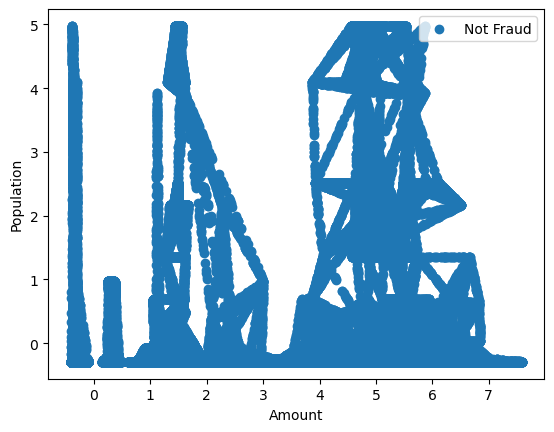

In [31]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [33]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'smote': SMOTE()
}

model_configs = {
    "LOG": LogisticRegression(),
    'LASSO': LogisticRegression(penalty = 'l1', 
                                solver = 'liblinear',
                                C = 2),
    'DTREE': DecisionTreeClassifier()
}

In [34]:
def calc_perf_metrics(y_true, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity=tp/(tp+fn) 
    specificity= tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [35]:
trained_models = {}
results = []

In [36]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
   
    for model_key, model in model_configs.items():
        conbined_key = f'{resample_key}_{model_key}'
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[conbined_key] = m
        
        y_pred = m.predict(X_test)
       
        sensitivity,specificity,precision,recall,f1 = calc_perf_metrics(y_true, y_pred)
        
        results.append({'Model': conbined_key,
                       "Sensitivity": sensitivity,
                       'specificity':specificity,
                       'precision':precision,
                       'recall':recall,
                       'f1':f1})
        

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature 

In [37]:
results_df = pd.DataFrame(results)

In [38]:
#split the model name into two columns
results_df[['resample','model']] = results_df['Model'].str.split('_', expand=True)

#reset a dual index for dataframe
results_df.set_index(['resample','model'], inplace=True)
results_df.drop('Model', axis=1, inplace=True)
results_df

Sensitivity  specificity  precision    recall        f1
resample model                                                         
over     LOG       0.720859     0.930870   0.039331  0.720859  0.074591
         LASSO     0.720859     0.930930   0.039363  0.720859  0.074651
         DTREE     0.601227     0.998675   0.640523  0.601227  0.620253
under    LOG       0.720859     0.917983   0.033357  0.720859  0.063763
         LASSO     0.720859     0.917128   0.033024  0.720859  0.063155
         DTREE     0.960123     0.943528   0.062575  0.960123  0.117492
smote    LOG       0.720859     0.928943   0.038305  0.720859  0.072744
         LASSO     0.720859     0.928919   0.038292  0.720859  0.072722
         DTREE     0.726994     0.992774   0.283154  0.726994  0.407567

Text(0.5, 1.0, 'Performance plot')

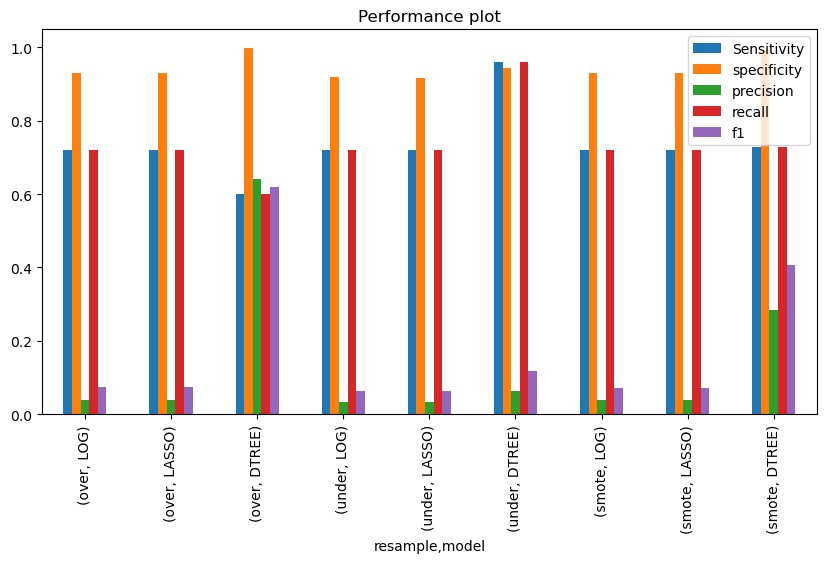

In [39]:
results_df_final = results_df
results_df_final.plot(kind='bar', figsize=(10,5))
plt.title('Performance plot')

In [40]:
clf = DecisionTreeClassifier(random_state = 42)

clf.fit(over_X, over_y)

y_pred = clf.predict(X_holdout)

sensitivity,specificity,precision,recall,f1 = calc_perf_metrics(y_holdout, y_pred)

print(f"Holdout Sensitivity: {sensitivity}")
print(f"Holdout Specificity: {specificity}")
print(f"Holdout Precesion: {precision}")
print(f"Holdout Recall: {recall}")
print(f"Holdout F-1: {f1}")

Holdout Sensitivity: 0.5635179153094463
Holdout Specificity: 0.9984467375468086
Holdout Precesion: 0.5728476821192053
Holdout Recall: 0.5635179153094463
Holdout F-1: 0.568144499178982


* Sensitivity: The Decision Tree (DTREE) model using the under-sampling strategy has the highest sensitivity score, indicating that it is the most effective at detecting positive cases.

* Specificity: The Decision Tree model has consistently high specificity across all sampling strategies, particularly over-sampling, showing that it is very good at detecting negative cases.

* Precision: The Decision Tree model with over-sampling has the best precision score, indicating that it produces a larger ratio of true positives among all positive findings.

* Recall: Recall is consistently strong across all models and resampling approaches, with Decision Tree under under-sampling outperforming marginally.

* F1 Score: The F1 score strikes a balance between precision and recall. The Decision Tree with Oversampling has the greatest F1 score, indicating a strong mix of precision and recall.

##### I would choose Decision Tree model under the under-samp;ing model, because we are trying to do credit card fraud detection here, the priority is sensitivity, the model I choose has high sensitivity. make sure we dont miss any fraud.